<a href="https://colab.research.google.com/github/tigrannh/Data-Science-ML-projects/blob/main/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge Regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

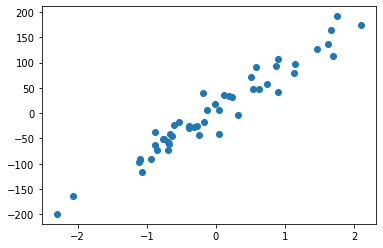

In [ ]:
plt.scatter(X, y)

In [ ]:
rr = Ridge(alpha=0)
rr.fit(X, y)
w = rr.coef_
rr.intercept_, w

(5.461106129084674, array([84.93241565]))

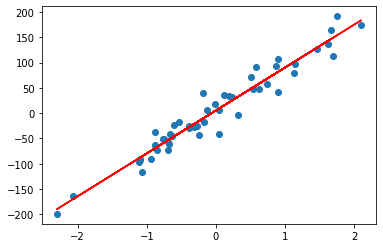

In [ ]:
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

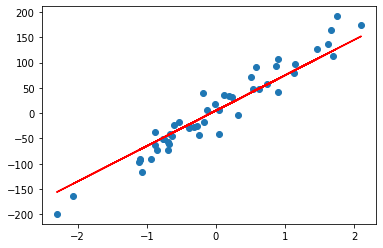

In [ ]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

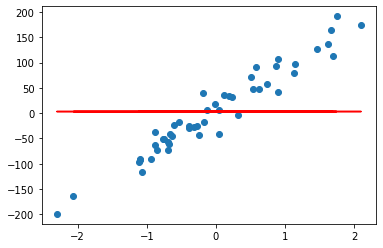

In [ ]:
rr = Ridge(alpha=1000000)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

In [ ]:
rr.intercept_, rr.coef_

(3.294170310146944, array([0.00399207]))

## Lasso Regression

#### Fit a linear model using sklearn with Lasso regularization

5.18970142386973 [74.2952876]


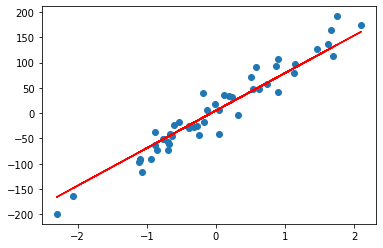

In [ ]:
from sklearn.linear_model import Lasso
rr = Lasso(alpha=10)
rr.fit(X, y)
w = rr.coef_
print(rr.intercept_, w)
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

5.406825188041685 82.8049900373846


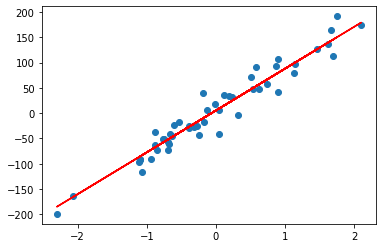

In [ ]:
rr = Lasso(alpha=2)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')
print(rr.intercept_, w)

## Implement function
`fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

In [ ]:
def fit_1d_ridge_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    #TODO (closed form solution or gradient descent)
    diag = np.eye(data_vector.shape[1]+1)
    diag[0,0] = 0
    X_new = np.column_stack((np.ones(data_vector.shape[0]),data_vector))
    return np.dot(np.dot(np.linalg.inv(np.dot(X_new.T,X_new) + lmb*diag), X_new.T), response_vector)
    

In [ ]:
w = fit_1d_ridge_regression(X, y, 3)

In [ ]:
def fit_1d_lasso_regression(data_vector, response_vector, n_iterations = 1000, learning_rate = 0.1, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    #TODO (Gradient descent ((full) batch gradient descent, stochastic gradient descent or mini-batch (stochastic) gradient descent))
    X_new = np.column_stack((np.ones(data_vector.shape[0]), data_vector))
    features = X_new.shape[1]
    beta = np.zeros(features)

    for i in range(n_iterations):
      deriv = np.sign(beta)
      deriv[0] = 0
      gradient = 1/(data_vector.shape[0])*np.dot(X_new.T, np.dot(X_new, beta) - response_vector) + lmb*deriv
      beta = beta - learning_rate*gradient
      
    return beta


    
    

In [ ]:
w = fit_1d_lasso_regression(X, y, learning_rate=0.001, lmb=3, n_iterations = 50000)
w

array([ 5.4594777 , 84.86859288])

## Apply your implemented lasso and ridge regression functions to the data and plot the results with matplotlib

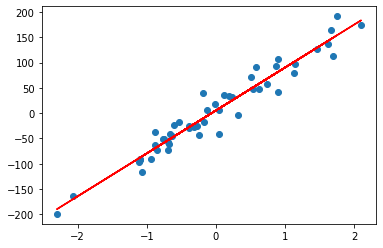

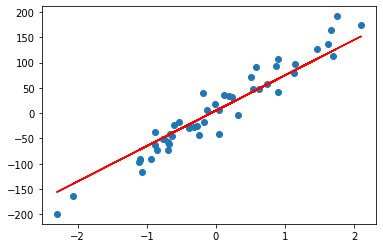

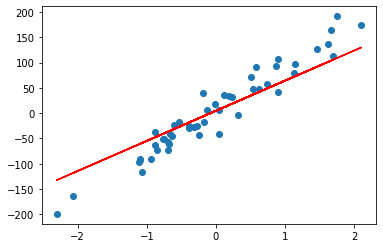

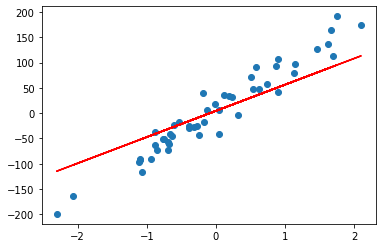

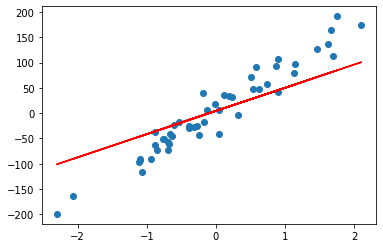

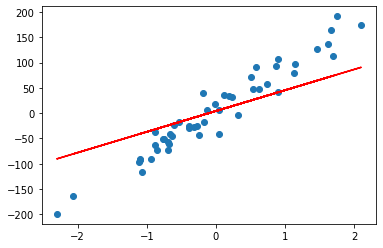

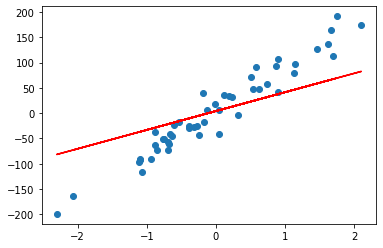

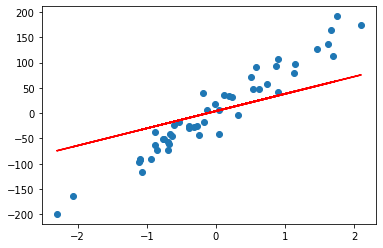

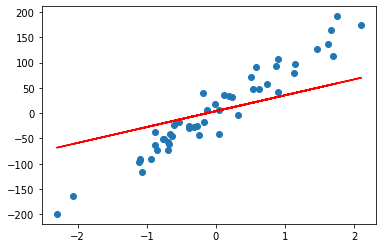

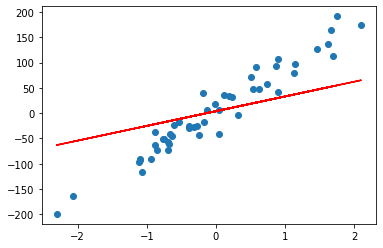

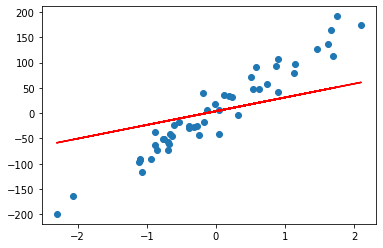

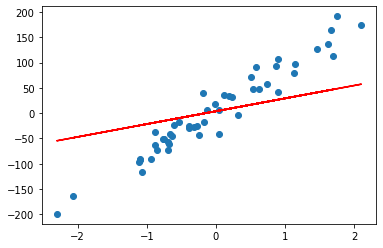

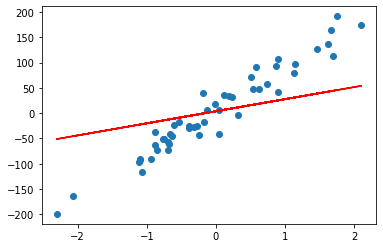

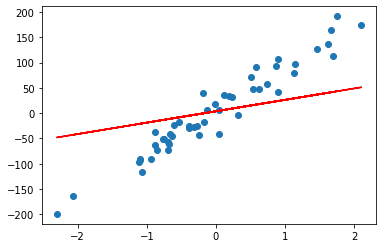

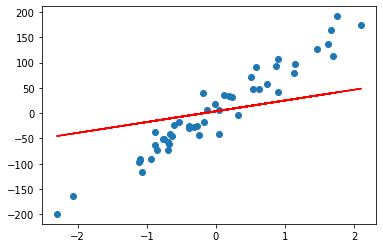

In [ ]:
for alpha in range(0, 150, 10):
  w = fit_1d_ridge_regression(X, y, alpha)
  plt.scatter(X, y)
  plt.plot(X, w[0]+w[1]*X, c='red')
  plt.show()
  w


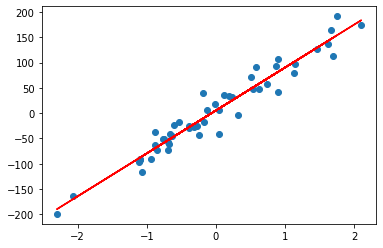

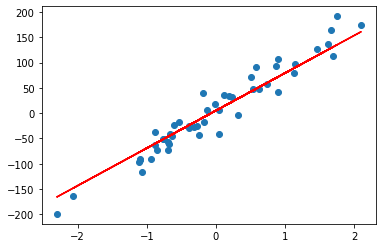

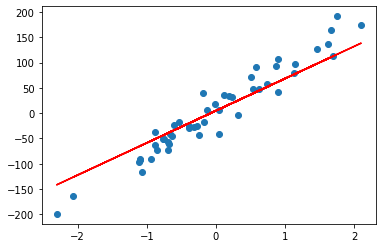

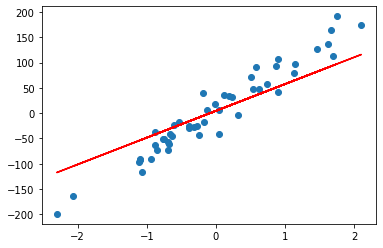

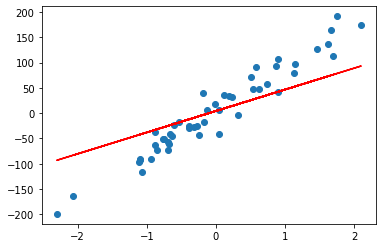

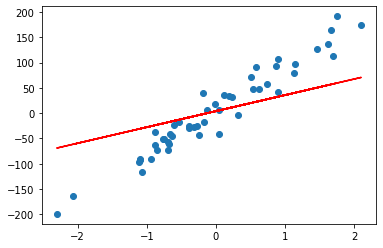

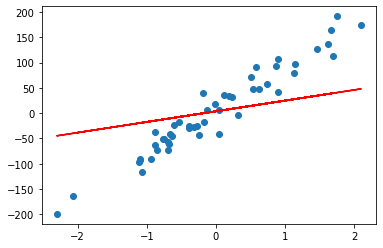

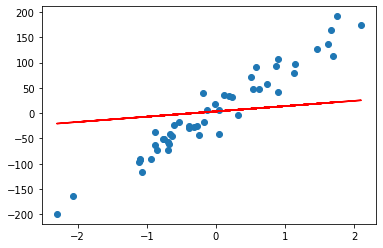

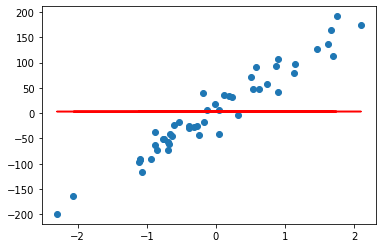

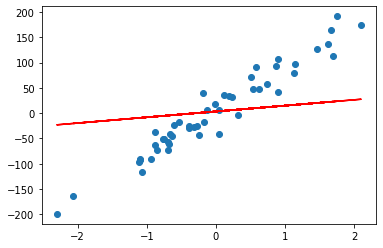

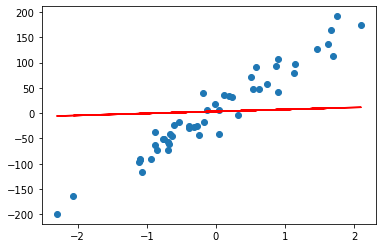

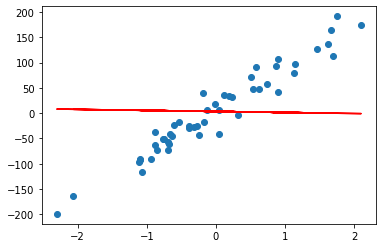

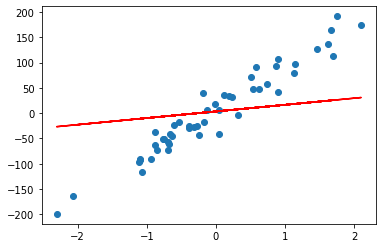

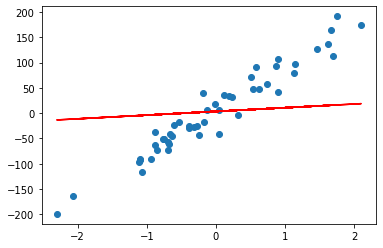

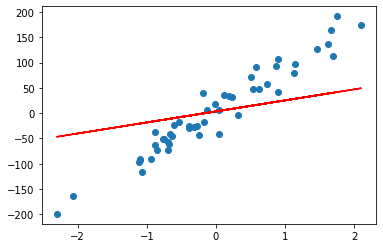

In [ ]:
for alpha in range(0, 150, 10):
    w = fit_1d_lasso_regression(X, y, learning_rate=0.1, n_iterations = 1000, lmb=alpha)
    plt.scatter(X, y)
    plt.plot(X, w[0]+w[1]*X, c='red')
    plt.show()
